# Homework 7

## Exercise 9.30
*Gradient and Newton methods*. Consider the unconstrained problem <br>
$
\begin{equation}
\text{minimize } f(x) = -\sum_{i=1}^{m} \log(1 - a_i^\top x) - \sum_{i=1}^{n} \log(1 - x_i^2)
\end{equation}
$
with variable $ x \in \mathbb{R}^n $ and $\mathbb{dom} f = \{ x \mid a_i^\top x < 1, i = 1, \ldots, m, \text{ and } |x_i| < 1, i = 1, \ldots, n \}$ <br>
This is the problem of computing the analytic center of the polyhedra in the domain.

### Part a
Use the gradient method to solve the problem, using reasonable choices for the backtracking parameters, and a stopping criterion of the form $\| \nabla f(x) \|_2 \leq \eta$. Plot the objective function and step length versus iteration number. Once you have determined $p^*$ to high accuracy, you can also plot $f-p^*$ versus iteration number. Experiment with the backtracking parameters $\alpha$ and $\beta$ to see their effect on the total number of iterations required. Carry these experiments out for several instances of the problem, of different sizes.

In [4]:
import numpy as np 
np.random.seed(42)

m = 100
n = 200

A = np.random.randn(m,n) * 100

x = np.zeros(n)

A_test = np.arange(m*n).reshape(m,n) / 10000000 #Using this to make sure a dummy vector x of ones is in the domain
x_test = np.ones(n) / 2 #Dummy vector to test the functions

def f(A, x):
    return - np.sum(np.log(1 - A @ x)) - np.sum(np.log(1-np.square(x)))

print(f"Test results: {f(A_test, x_test):.2f}")

Test results: 68.28


Calculating the gradient of the objective function:
\begin{equation}
    \nabla f(x) = -\sum_{i=1}^m \frac{1}{1-a_i^\top x} a_i - 2x \odot \frac{1}{1 - \text{diag(x)}x}
\end{equation}

In [5]:
def grad_f(A,x): #Like 80% confident on this implementation
    return A.T @ (1/(1-A@x))  + 2*x/ (1-x*x)

grad_f(A_test, x_test).shape

(200,)

Gradient descent time

In [6]:
def backtrack_search(x, delta_x, alpha, beta):
    t = 1

    while f(A, x+t*delta_x) > f(A,x) + alpha * t * grad_f(A,x).T @ delta_x or np.isnan(f(A,x)) or np.isnan(f(A, x+t*delta_x)):
        t = beta * t
    return t

def append_to_results(results,i,x,fx,grad_fx,delta_x, t):
    results["iteration"].append(i)
    results["x"].append(x)
    results["f(x)"].append(fx)
    results["grad_f(x)"].append(grad_fx)
    results["delta_x"].append(delta_x)
    results['t'].append(t)
    return results

def gradient_descent(A, x_0, alpha, beta, eta):
    results = {
        "iteration": [],
        "x": [],
        "f(x)": [],
        "grad_f(x)": [],
        "delta_x": [],
        "t": []
	}
    i=0
    x = x_0
    
    while np.linalg.norm(grad_f(A,x),2) >  eta and i <=100:
        delta_x = - grad_f(A,x)
        t = backtrack_search(x, delta_x, alpha, beta)
        
        x += t * delta_x
        i += 1
        
        results = append_to_results(results, i, x, f(A,x), grad_f(A,x), delta_x, t)
    
    return results

In [7]:
#One shot so it is re-runnable
import numpy as np 
np.random.seed(42)

m = 100
n = 200

A = np.random.randn(m,n) * 100

x = np.zeros(n)

alpha = 0.10 #Heuristic choice
beta = 0.50 #Heuristic choice
eta = 0.001 #Heuristic choice


results = gradient_descent(A, x, alpha, beta, eta)
results.keys()

/var/folders/w5/rh2cx23174z28g3pjv50mlrr0000gn/T/ipykernel_1219/491365960.py:15: RuntimeWarning: invalid value encountered in log
  return - np.sum(np.log(1 - A @ x)) - np.sum(np.log(1-np.square(x)))


dict_keys(['iteration', 'x', 'f(x)', 'grad_f(x)', 'delta_x', 't'])

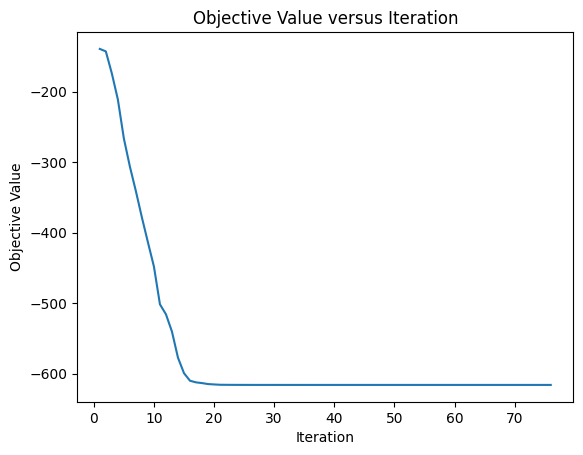

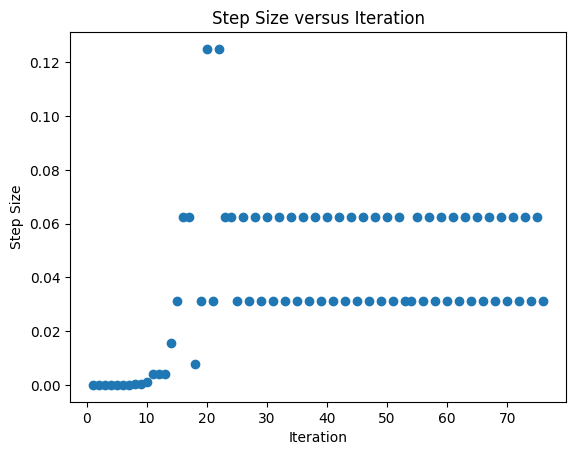

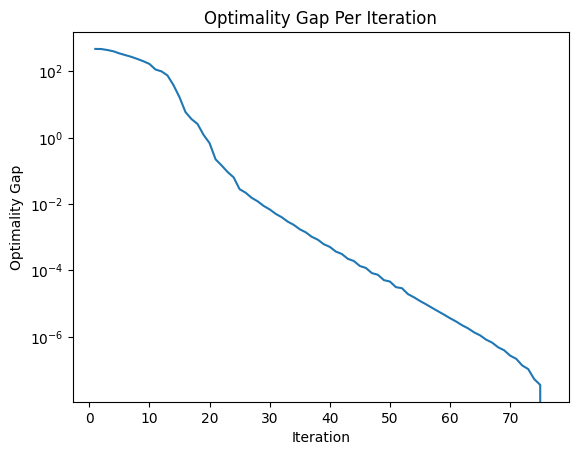

In [8]:
import matplotlib.pyplot as plt

iters = results['iteration']
f_vals = results['f(x)']
ts = results['t']

plt.plot(iters, f_vals)
plt.title("Objective Value versus Iteration")
plt.ylabel("Objective Value")
plt.xlabel("Iteration")
plt.show()

plt.scatter(iters, ts)
plt.title("Step Size versus Iteration")
plt.ylabel('Step Size')
plt.xlabel('Iteration')
plt.show()

plt.plot(iters, f_vals - min(f_vals))
plt.yscale('log')
plt.title("Optimality Gap Per Iteration")
plt.ylabel("Optimality Gap")
plt.xlabel("Iteration")
plt.show()

In [9]:
#One shot so it is re-runnable
import numpy as np 
np.random.seed(42)

m = 100
n = 200



eta = 0.1

#Experimenting with alpha and beta
alpha_beta_experiment = {
    'alphas': [],
    'betas': [],
    'n_iters': []
}
for iter_count in range(100):
    A = np.random.randn(m,n) * 100
    x = np.zeros(n)
    
    alpha = np.random.rand()/2
    beta = np.random.rand()
    
    if alpha == 0:
        alpha = 0.1
        
    if beta == 0:
        beta = 0.3

    results = gradient_descent(A,x,alpha, beta,eta)
    
    alpha_beta_experiment['alphas'].append(alpha)
    alpha_beta_experiment['betas'].append(beta)
    alpha_beta_experiment['n_iters'].append(len(results['iteration']))
    
    if iter_count % 10 == 0:
        print(f"Iteration: {iter_count}")
    



/var/folders/w5/rh2cx23174z28g3pjv50mlrr0000gn/T/ipykernel_1219/491365960.py:15: RuntimeWarning: invalid value encountered in log
  return - np.sum(np.log(1 - A @ x)) - np.sum(np.log(1-np.square(x)))


Iteration: 0
Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90


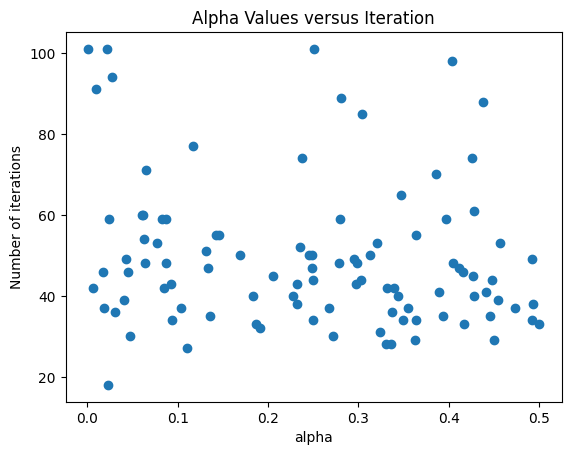

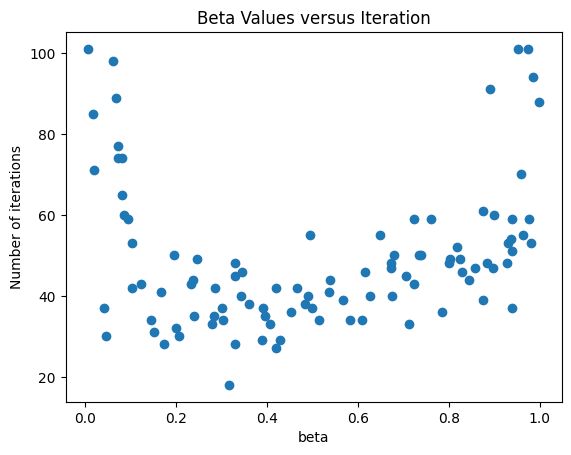

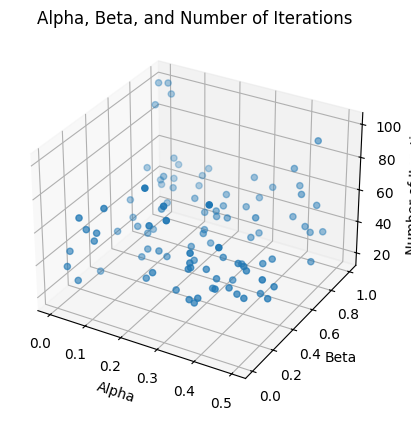

In [10]:
from mpl_toolkits.mplot3d import Axes3D

#plotting
import matplotlib.pyplot as plt

plt.scatter(alpha_beta_experiment['alphas'], alpha_beta_experiment['n_iters'])
plt.title('Alpha Values versus Iteration')
plt.xlabel('alpha')
plt.ylabel("Number of iterations")
plt.show()

plt.scatter(alpha_beta_experiment['betas'], alpha_beta_experiment['n_iters'])
plt.title('Beta Values versus Iteration')
plt.xlabel('beta')
plt.ylabel("Number of iterations")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

alphas = alpha_beta_experiment['alphas']
betas = alpha_beta_experiment['betas']
n_iters = alpha_beta_experiment['n_iters']

ax.scatter(alphas, betas, n_iters)
ax.set_title('Alpha, Beta, and Number of Iterations')
ax.set_xlabel('Alpha')
ax.set_ylabel('Beta')
ax.set_zlabel('Number of Iterations')

plt.show()

### Part b
Repeat using Newton's method, with stopping criterion based on the Newton decrement $\lambda^2$. Look for quadratic convergence. You do not have to use an efficient method to compute the Newton step, as in exercise 9.27; you can use a general purpose dense solver, although it is better to use one that is based on a Cholesky factorization.

In [51]:
#From part a
import numpy as np 
np.random.seed(42)

def set_problem_parameters(m=100, n=200, seed=42):
    np.random.seed(seed)

    A = np.random.randn(m,n)

    x = np.zeros(n)

    return A, x

def set_hyperparameters(alpha=0.1,beta=0.5,epsilon=0.0001):
    return alpha, beta, epsilon

def f(A, x):
    return - np.sum(np.log(1 - A @ x)) - np.sum(np.log(1-np.square(x)))

def grad_f(A,x): #Like 80% confident on this implementation
    return A.T @ (1/(1-A@x))  + 2*x/ (1-x*x)

def backtrack_search(x, delta_x, alpha, beta):
    t = 1

    while f(A, x+t*delta_x) > f(A,x) + alpha * t * grad_f(A,x).T @ delta_x or np.isnan(f(A,x)) or np.isnan(f(A, x+t*delta_x)):
        t = beta * t
    return t

Gotta calculate the hessian you know the vibes
\begin{equation}
    \nabla^2 f(x) = A^\top diag(\frac{1}{(1-Ax)^2}) A + \text{diag(v)}
\end{equation}

where $v$ is a vector with $i$-th entries $\frac{1+x_i^2}{(1-x_i^2)^2}$

In [52]:
# A lil testing
print(x_test[:5])
print( (1+x_test[0]**2) / (1-x_test[0]**2)**2 )
print(((1+np.square(x_test)) / np.square((1-np.square(x_test))))[:5])

[0.5 0.5 0.5 0.5 0.5]
2.2222222222222223
[2.22222222 2.22222222 2.22222222 2.22222222 2.22222222]


In [53]:
#Hessian
def hess_f(A,x):
    return A.T @ np.diag(1 / np.square(1 - A @ x)) @ A + np.diag((1+np.square(x)) / np.square((1-np.square(x))))

hess_f(A_test, x_test).shape

(200, 200)

In [56]:
#Newtons method

def append_to_results_nm(results,i,x,fx,grad_fx, hess_fx, delta_x, t, lambda2):
    results["iteration"].append(i)
    results["x"].append(x)
    results["f(x)"].append(fx)
    results["grad_f(x)"].append(grad_fx)
    results['hess_f(x)'].append(hess_fx)
    results["delta_x"].append(delta_x)
    results['t'].append(t)
    results['lambda^2'].append(lambda2)

    return results

def newtons_method(A, x_0, alpha, beta, epsilon):
    results = {
        "iteration": [],
        "x": [],
        "f(x)": [],
        "grad_f(x)": [],
        "hess_f(x)": [],
        "delta_x": [],
        "t": [],
        "lambda^2": []
	}
    i=0
    x = x_0
    
    while True:
        f_x = f(A,x)
        grad_x = grad_f(A,x)
        hess_x = hess_f(A,x)
        delta_x = - np.linalg.inv(hess_x) @ grad_x
        lambda2 = grad_x.T @ np.linalg.inv(hess_x) @ grad_x

        if lambda2 / 2 <= epsilon:
            break
        
        t = backtrack_search(x, delta_x, alpha, beta)
        
        x += t * delta_x
        i += 1
        
        results = append_to_results_nm(results, i, x, f_x, grad_x, hess_x, delta_x, t, lambda2)
    
    return results

In [65]:
#One shot so it is re-runnable
A, x = set_problem_parameters()

alpha, beta, epsilon = set_hyperparameters(epsilon=10e-8)


results = newtons_method(A, x, alpha, beta, epsilon)
results.keys()

dict_keys(['iteration', 'x', 'f(x)', 'grad_f(x)', 'hess_f(x)', 'delta_x', 't', 'lambda^2'])

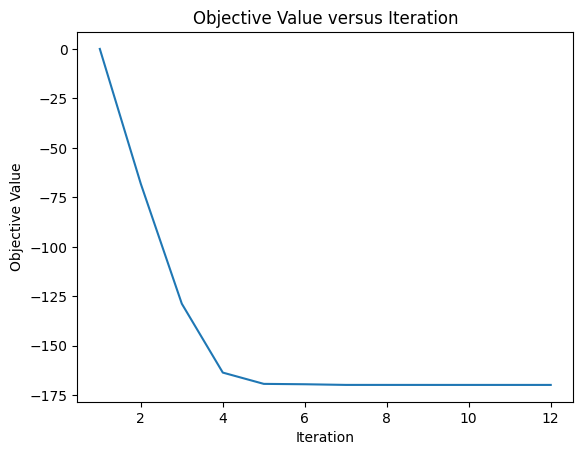

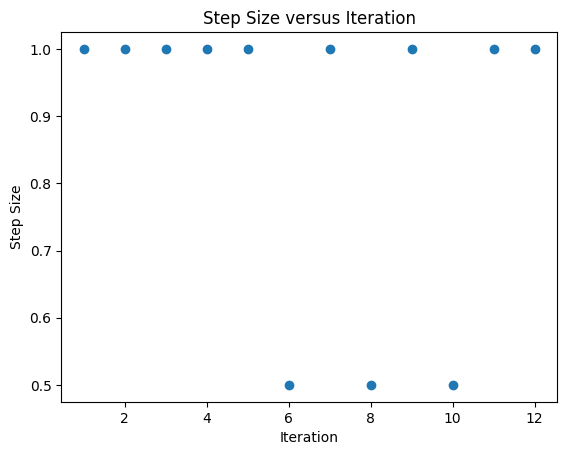

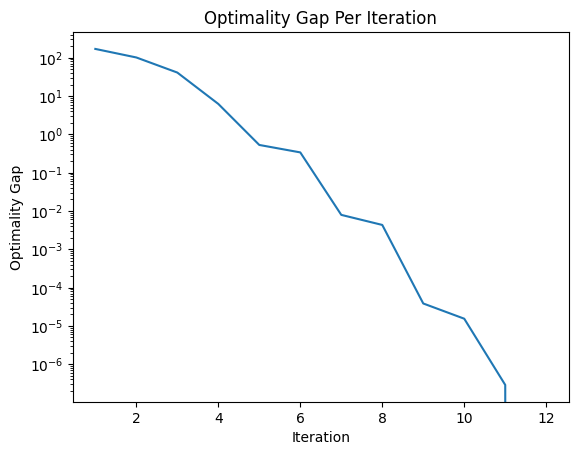

In [66]:
import matplotlib.pyplot as plt

iters = results['iteration']
f_vals = results['f(x)']
ts = results['t']

plt.plot(iters, f_vals)
plt.title("Objective Value versus Iteration")
plt.ylabel("Objective Value")
plt.xlabel("Iteration")
plt.show()

plt.scatter(iters, ts)
plt.title("Step Size versus Iteration")
plt.ylabel('Step Size')
plt.xlabel('Iteration')
plt.show()

plt.plot(iters, f_vals - min(f_vals))
plt.yscale('log')
plt.title("Optimality Gap Per Iteration")
plt.ylabel("Optimality Gap")
plt.xlabel("Iteration")
plt.show()

## Exercise 9.31
*Some approximate Newton methods.* The cost of Newton's method is dominated by the cost of evaluating the Hessian $\nabla^2 f(x)$ and the cost of solving the Newton system. For large problems, it is sometimes useful to replace the Hessian by a positive definite approximation that makes it easier to form and solve for the search step. In this problem we explore some common examples of this idea. <br> <br>
For each of the approximation Newton methods described below, test the method on some instances of the analytic center problem described in exercise 9.30, and compute the results to those obtained using the Newton method and gradient method.

### Part a
*Re-using the Hessian.* We evaluate and factor the Hessian only every N iterations, where N > 1, and use the search step $\Delta x = -H^{-1} \nabla f(x)$, where $H$ is the last Hessian evaluted. (We need to evaluate and factor the Hessian once every N steps; for the other steps, we compute the search direction using back and forward substitution.)

In [75]:
def set_problem_parameters(m=100, n=200, seed=42):
    """
    Sets up the problem parameters for a convex optimization problem.

    Parameters:
    m (int): Number of rows for matrix A. Default is 100.
    n (int): Number of columns for matrix A and size of vector x. Default is 200.
    seed (int): Seed for the random number generator to ensure reproducibility. Default is 42.

    Returns:
    tuple: A tuple containing:
        - A (numpy.ndarray): A randomly generated m x n matrix with entries drawn from a standard normal distribution.
        - x (numpy.ndarray): A zero vector of length n.
    """
    np.random.seed(seed)

    A = np.random.randn(m,n)

    x = np.zeros(n)

    return A, x

def set_hyperparameters(alpha=0.1, beta=0.5, epsilon=0.0001):
    """
    Set the hyperparameters for an optimization algorithm.

    Parameters:
    alpha (float): The step size or learning rate. Default is 0.1.
    beta (float): The momentum parameter. Default is 0.5.
    epsilon (float): The tolerance for convergence. Default is 0.0001.

    Returns:
    tuple: A tuple containing the values of alpha, beta, and epsilon.
    """
    return alpha, beta, epsilon

def f(A, x):
    """
    Computes the value of the function f(A, x) = -sum(log(1 - A @ x)) - sum(log(1 - x^2)).

    Parameters:
    A (numpy.ndarray): A 2D numpy array.
    x (numpy.ndarray): A 1D numpy array.

    Returns:
    float: The computed value of the function.
    """
    return - np.sum(np.log(1 - A @ x)) - np.sum(np.log(1-np.square(x)))

def grad_f(A, x):
    """
    Computes the gradient of the function f at point x.

    Parameters:
    A (numpy.ndarray): A matrix of shape (m, n).
    x (numpy.ndarray): A vector of shape (n,).

    Returns:
    numpy.ndarray: The gradient of the function f at point x, a vector of shape (n,).
    """
    return A.T @ (1/(1-A@x))  + 2*x/ (1-x*x)

def backtrack_search(x, delta_x, alpha, beta):
    """
    Perform backtracking line search to find the step size that satisfies the Armijo-Goldstein condition.

    Parameters:
    x (numpy.ndarray): Current point in the optimization process.
    delta_x (numpy.ndarray): Descent direction.
    alpha (float): Parameter for sufficient decrease condition (0 < alpha < 0.5).
    beta (float): Backtracking factor (0 < beta < 1).

    Returns:
    float: Step size that satisfies the Armijo-Goldstein condition.
    """
    t = 1

    while f(A, x+t*delta_x) > f(A,x) + alpha * t * grad_f(A,x).T @ delta_x or np.isnan(f(A,x)) or np.isnan(f(A, x+t*delta_x)):
        t = beta * t
    return t

def hess_f(A, x):
    """
    Computes the Hessian matrix of a given function.

    Parameters:
    A (numpy.ndarray): A 2D array representing the matrix A.
    x (numpy.ndarray): A 1D array representing the vector x.

    Returns:
    numpy.ndarray: The Hessian matrix of the function.
    """
    return A.T @ np.diag(1 / np.square(1 - A @ x)) @ A + np.diag((1+np.square(x)) / np.square((1-np.square(x))))

def append_to_results_nm(results, i, x, fx, grad_fx, hess_fx, delta_x, t, lambda2):
    """
    Appends the provided values to the corresponding lists in the results dictionary.

    Parameters:
    results (dict): A dictionary containing lists to store the results of each iteration.
    i (int): The current iteration number.
    x (array-like): The current value of the variable x.
    fx (float): The current value of the function f(x).
    grad_fx (array-like): The gradient of the function f(x) at x.
    hess_fx (array-like): The Hessian of the function f(x) at x.
    delta_x (array-like): The change in x.
    t (float): The step size or other relevant parameter.
    lambda2 (float): The value of lambda squared.

    Returns:
    dict: The updated results dictionary with the new values appended.
    """
    results["iteration"].append(i)
    results["x"].append(x)
    results["f(x)"].append(fx)
    results["grad_f(x)"].append(grad_fx)
    results['hess_f(x)'].append(hess_fx)
    results["delta_x"].append(delta_x)
    results['t'].append(t)
    results['lambda^2'].append(lambda2)

    return results

def plot_results(results):
    iters = results['iteration']
    f_vals = results['f(x)']
    ts = results['t']

    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    axs[0].plot(iters, f_vals)
    axs[0].set_title("Objective Value versus Iteration")
    axs[0].set_ylabel("Objective Value")
    axs[0].set_xlabel("Iteration")

    axs[1].scatter(iters, ts)
    axs[1].set_title("Step Size versus Iteration")
    axs[1].set_ylabel('Step Size')
    axs[1].set_xlabel('Iteration')

    axs[2].plot(iters, f_vals - min(f_vals))
    axs[2].set_yscale('log')
    axs[2].set_title("Optimality Gap Per Iteration")
    axs[2].set_ylabel("Optimality Gap")
    axs[2].set_xlabel("Iteration")

    plt.tight_layout()
    plt.show()

In [76]:
def newtons_method(A, x_0, alpha, beta, epsilon, N=1):
    results = {
        "iteration": [],
        "x": [],
        "f(x)": [],
        "grad_f(x)": [],
        "hess_f(x)": [],
        "delta_x": [],
        "t": [],
        "lambda^2": []
	}
    i=0
    x = x_0
    
    while True:
        f_x = f(A,x)
        grad_x = grad_f(A,x)
        if i % N == 0:
            hess_x = hess_f(A,x)
            
        delta_x = - np.linalg.inv(hess_x) @ grad_x
        lambda2 = grad_x.T @ np.linalg.inv(hess_x) @ grad_x

        if lambda2 / 2 <= epsilon:
            break
        
        t = backtrack_search(x, delta_x, alpha, beta)
        
        x += t * delta_x
        i += 1
        
        results = append_to_results_nm(results, i, x, f_x, grad_x, hess_x, delta_x, t, lambda2)
    
    return results

/var/folders/w5/rh2cx23174z28g3pjv50mlrr0000gn/T/ipykernel_1219/2856613880.py:48: RuntimeWarning: invalid value encountered in log
  return - np.sum(np.log(1 - A @ x)) - np.sum(np.log(1-np.square(x)))


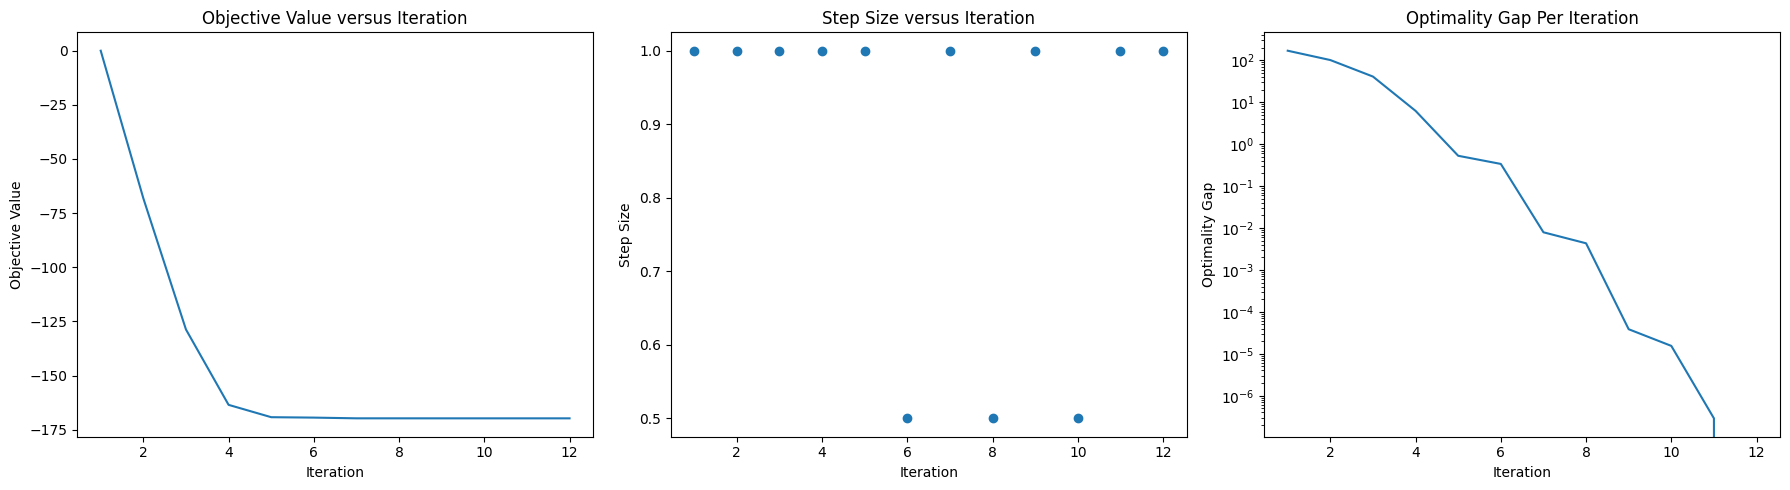

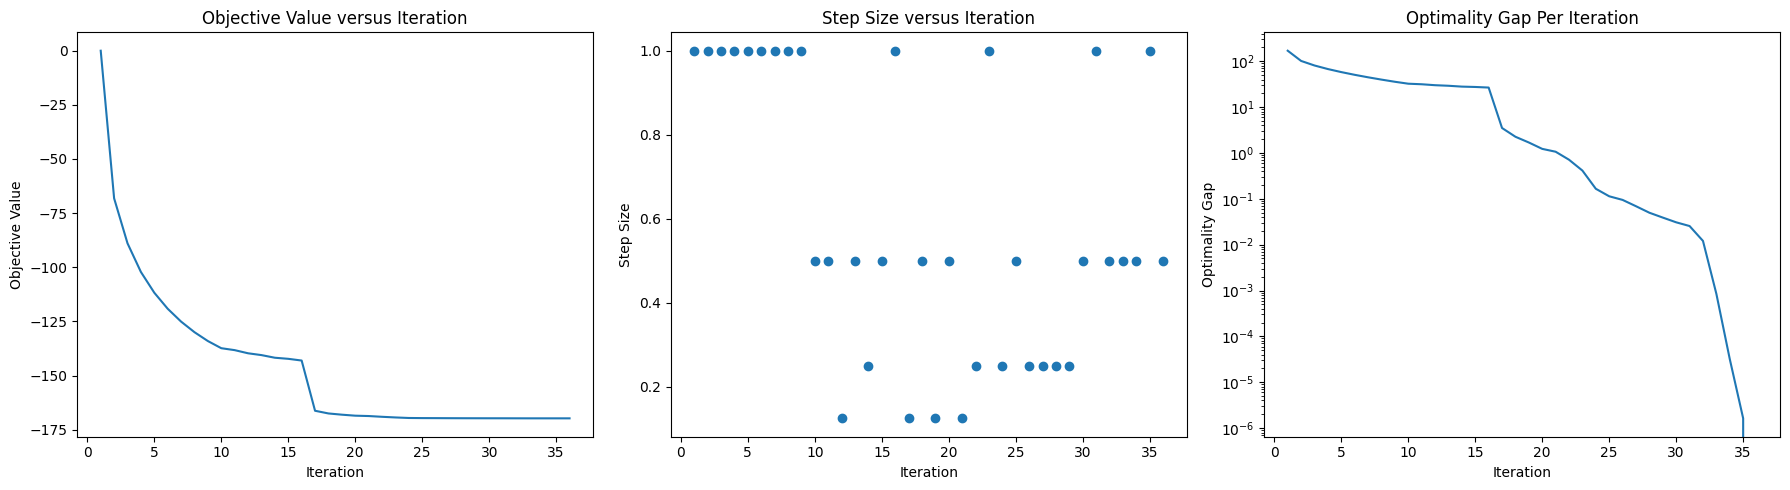

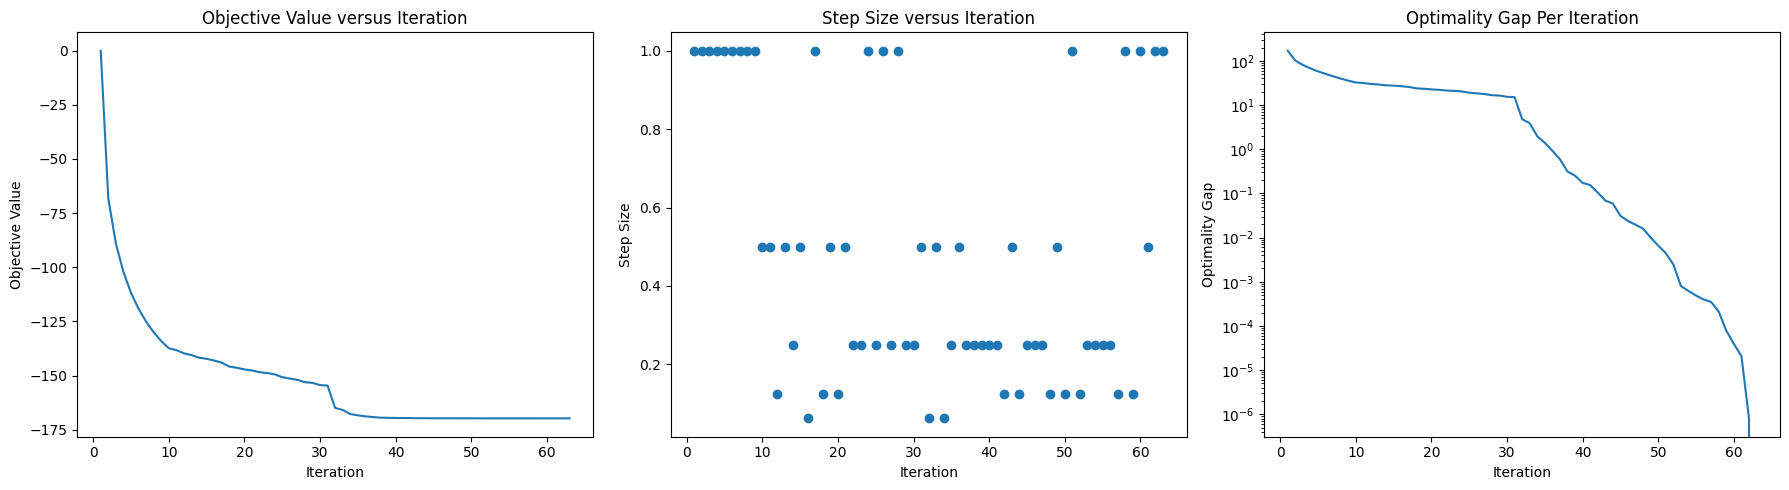

In [83]:
alpha, beta, epsilon = set_hyperparameters(epsilon=10e-8)

A, x = set_problem_parameters()
results_N_1 = newtons_method(A, x, alpha, beta, epsilon,N=1)

A, x = set_problem_parameters()
results_N_15 = newtons_method(A, x, alpha, beta, epsilon,N=15)

A, x = set_problem_parameters()
results_N_30 = newtons_method(A, x, alpha, beta, epsilon,N=30)

plot_results(results_N_1)
plot_results(results_N_15)
plot_results(results_N_30)

### Part b
*Diagonal Approximation.* We replace the Hessian by its diagonal, so we only have to evaluate the n second derivatives $\frac{d^2 f(x)}{dx_i^2}$, and computing the search step is very easy. 

For this problem, the hessian was computed with two terms
\begin{equation}
    \nabla^2 f(x) = A^\top diag(\frac{1}{(1-Ax)^2}) A + \text{diag(v)}
\end{equation}

where $v$ is a vector with $i$-th entries $\frac{1+x_i^2}{(1-x_i^2)^2}$. <br>
The second term is already a diagonal matrix $\in \mathbb{R}^{n \times n}$ <br>
And a derivative of 
\begin{equation}
    \nabla f(x) = -\frac{1}{1-a_i^\top x} a_i - 2x \odot \frac{1}{1 - \text{diag(x)}x}
\end{equation}

In [104]:
def hess_f(A, x, diagonal_approximation = False):
    hess = A.T @ np.diag(1 / np.square(1 - A @ x)) @ A + np.diag((1+np.square(x)) / np.square((1-np.square(x))))
    if diagonal_approximation:
        return np.diag(np.diag(hess))
    else:
        return hess
        

In [105]:
def newtons_method(A, x_0, alpha, beta, epsilon, N=1, diag_approx=False):
    results = {
        "iteration": [],
        "x": [],
        "f(x)": [],
        "grad_f(x)": [],
        "hess_f(x)": [],
        "delta_x": [],
        "t": [],
        "lambda^2": []
	}
    i=0
    x = x_0
    
    while True:
        f_x = f(A,x)
        grad_x = grad_f(A,x)
        if i % N == 0:
            hess_x = hess_f(A,x,diag_approx)
            
        delta_x = - np.linalg.inv(hess_x) @ grad_x
        lambda2 = grad_x.T @ np.linalg.inv(hess_x) @ grad_x

        if lambda2 / 2 <= epsilon:
            break
        
        t = backtrack_search(x, delta_x, alpha, beta)
        
        x += t * delta_x
        i += 1
        
        results = append_to_results_nm(results, i, x, f_x, grad_x, hess_x, delta_x, t, lambda2)
    
    return results

/var/folders/w5/rh2cx23174z28g3pjv50mlrr0000gn/T/ipykernel_1219/2856613880.py:48: RuntimeWarning: invalid value encountered in log
  return - np.sum(np.log(1 - A @ x)) - np.sum(np.log(1-np.square(x)))


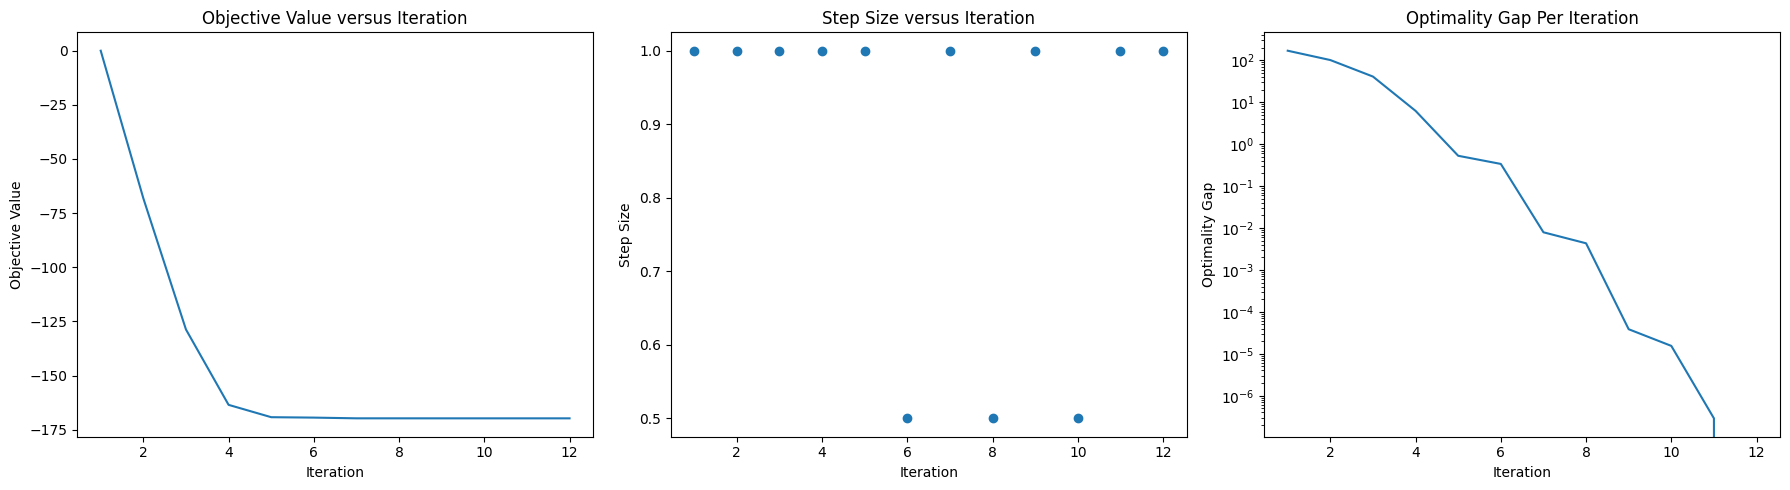

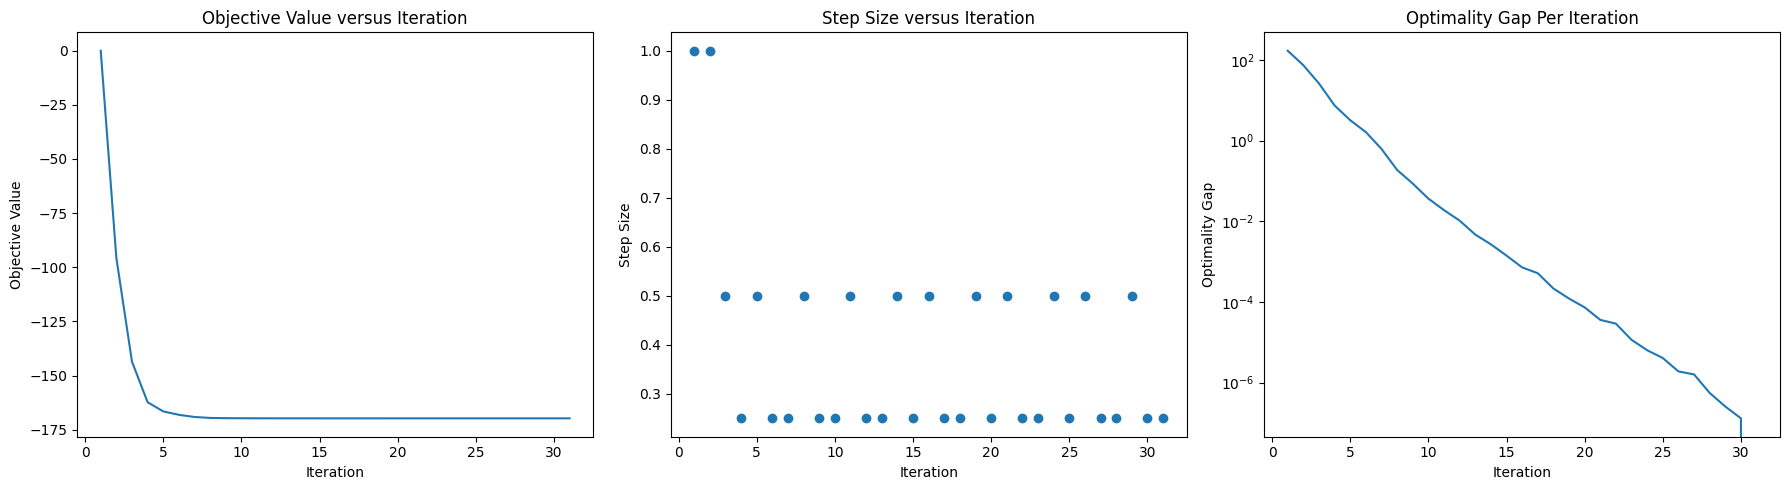

In [107]:
alpha, beta, epsilon = set_hyperparameters(epsilon=10e-8)

A, x = set_problem_parameters()
results_no_approx = newtons_method(A, x, alpha, beta, epsilon,N=1)

A, x = set_problem_parameters()
results_hess_approx = newtons_method(A, x, alpha, beta, epsilon,1,True)

plot_results(results_no_approx)
plot_results(results_hess_approx)

## Additional Exercise HW 7.1
*Three-way linear classification.* We are given data
\begin{equation}
    x^{(1)}, \dots, x^{(N)}, \quad y^{(1)}, \dots, y^{(M)}, \quad z^{(1)}, \dots, z^{(P)}
\end{equation}
which are three nonempty vectors in $\mathbb{R}^n$. We wish to find three affine functions on $\mathbb{R}^n$, 
\begin{equation}
    f_i(z) = a_i^\top z - b_i, \quad i=1,2,3
\end{equation}

that satisfy the following properties
\begin{gather}
    f_1(x^{(j)}) > \max \{ f_2(x^{(j)}), f_3(x^{(j)}) \}, \quad j=1,\dots,N \\
    f_2(y^{(j)}) > \max \{ f_1(y^{(j)}), f_3(y^{(j)}) \}, \quad j=1,\dots,M \\
    f_3(z^{(j)}) > \max \{ f_1(z^{(j)}), f_2(z^{(j)}) \}, \quad j=1,\dots,P \\
\end{gather}
In words: $f_1$ is the largest of the three functions on the $x$ data points, $f_2$ is the largest of the three functions on the $y$ data points, $f_3$ is the largest of the three functions on the $z$ data points. We can give a simple geometric interpretation: the functions $f_1,f_2,f_3$ partition $\mathbb{R}^n$ into three regions,
\begin{gather}
    R_1 = \{ z | f_1(z) > \max \{ f_2(z), f_3(z) \} \} \\
    R_2 = \{ z | f_2(z) > \max \{ f_1(z), f_3(z) \} \} \\
    R_3 = \{ z | f_3(z) > \max \{ f_1(z), f_2(z) \} \}
\end{gather}
defined by where each function is the largest of the three. Our goal is to find functions with $x^{(j)} \in R_1, y^{(j)} \in R_2, z^{(j)} \in R_3$. <br>
Pose this as a convex optimization problem. You may not use strict inequalities in your formulation. <br>
Solve the specific instance of the 3-way separation problem given in sep3way_data.m, with the columns of the matrices $X, Y, Z$ giving the data vectors. To save you the trouble of plotting data points and separation boundaries, we have included the plotting code in sep3way_data.m. (the a1,a2,a3,b1, and b2 are arbitrary numbers and you must find the correct values).

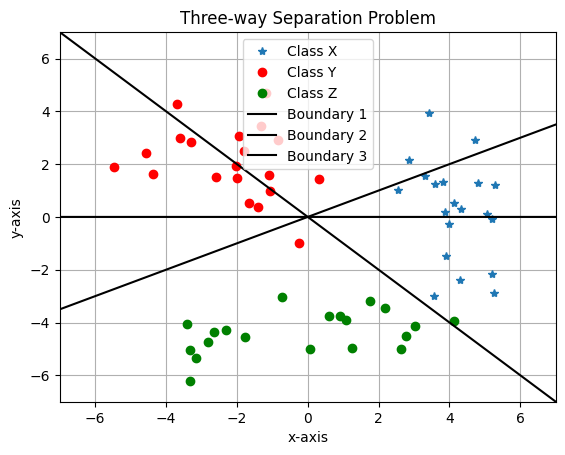

In [114]:
import numpy as np
import matplotlib.pyplot as plt

# Data for problem instance
X = np.array([
    [3.5674, 4.1253, 2.8535, 5.1892, 4.3273, 3.8133, 3.4117, 3.8636, 5.0668, 3.9044, 4.2944, 4.7143, 3.3082, 5.2540, 2.5590, 3.6001, 4.8156, 5.2902, 5.1908, 3.9802],
    [-2.9981, 0.5178, 2.1436, -0.0677, 0.3144, 1.3064, 3.9297, 0.2051, 0.1067, -1.4982, -2.4051, 2.9224, 1.5444, -2.8687, 1.0281, 1.2420, 1.2814, 1.2035, -2.1644, -0.2821]
])

Y = np.array([
    [-4.5665, -3.6904, -3.2881, -1.6491, -5.4731, -3.6170, -1.1876, -1.0539, -1.3915, -2.0312, -1.9999, -0.2480, -1.3149, -0.8305, -1.9355, -1.0898, -2.6040, -4.3602, -1.8105, 0.3096],
    [2.4117, 4.2642, 2.8460, 0.5250, 1.9053, 2.9831, 4.7079, 0.9702, 0.3854, 1.9228, 1.4914, -0.9984, 3.4330, 2.9246, 3.0833, 1.5910, 1.5266, 1.6256, 2.5037, 1.4384]
])

Z = np.array([
    [1.7451, 2.6345, 0.5937, -2.8217, 3.0304, 1.0917, -1.7793, 1.2422, 2.1873, -2.3008, -3.3258, 2.7617, 0.9166, 0.0601, -2.6520, -3.3205, 4.1229, -3.4085, -3.1594, -0.7311],
    [-3.2010, -4.9921, -3.7621, -4.7420, -4.1315, -3.9120, -4.5596, -4.9499, -3.4310, -4.2656, -6.2023, -4.5186, -3.7659, -5.0039, -4.3744, -5.0559, -3.9443, -4.0412, -5.3493, -3.0465]
])

# Variables and coefficients (to be optimized, but here hardcoded for illustration)
a1 = np.array([1, 1])
a2 = np.array([1, -5])
a3 = np.array([-1, -1])
b1 = 0
b2 = 0
b3 = 0

# Find maximally confusing point
A = np.vstack((a1 - a2, a1 - a3))
b = np.array([b1 - b2, b1 - b3])
p = np.linalg.lstsq(A, b, rcond=None)[0]

# Plotting
t = np.linspace(-7, 7, 1400)
u1 = a1 - a2
u2 = a2 - a3
u3 = a3 - a1
v1 = b1 - b2
v2 = b2 - b3
v3 = b3 - b1

line1 = (-t * u1[0] + v1) / u1[1]
line2 = (-t * u2[0] + v2) / u2[1]
line3 = (-t * u3[0] + v3) / u3[1]

# Plot decision boundaries and data points
plt.plot(X[0], X[1], '*', label='Class X')
plt.plot(Y[0], Y[1], 'ro', label='Class Y')
plt.plot(Z[0], Z[1], 'go', label='Class Z')
plt.plot(t, line1, 'k', label='Boundary 1')
plt.plot(t, line2, 'k', label='Boundary 2')
plt.plot(t, line3, 'k', label='Boundary 3')

plt.legend()
plt.axis([-7, 7, -7, 7])
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Three-way Separation Problem')
plt.grid()
plt.show()


\begin{align}
  \text{minimize} & \quad -u - w - v \\
  \text{subject to} & \quad f_1(x^{(j)}) \geq \max \{ f_2(x^{(j)}), f_3(x^{(j)}) \} + u \\
  & \quad f_2(y^{(j)}) \geq \max \{ f_1(y^{(j)}), f_3(y^{(j)}) \} + w \\
  & \quad f_3(z^{(j)}) \geq \max \{ f_1(z^{(j)}), f_2(z^{(j)}) \} + v \\
  & \quad \sum_i a_i = 0 \\
  & \quad \sum_i b_i = 0
\end{align}

In [134]:
import cvxpy as cp
import numpy as np

X = np.array([
    [3.5674, 4.1253, 2.8535, 5.1892, 4.3273, 3.8133, 3.4117, 3.8636, 5.0668, 3.9044, 4.2944, 4.7143, 3.3082, 5.2540, 2.5590, 3.6001, 4.8156, 5.2902, 5.1908, 3.9802],
    [-2.9981, 0.5178, 2.1436, -0.0677, 0.3144, 1.3064, 3.9297, 0.2051, 0.1067, -1.4982, -2.4051, 2.9224, 1.5444, -2.8687, 1.0281, 1.2420, 1.2814, 1.2035, -2.1644, -0.2821]
])

Y = np.array([
    [-4.5665, -3.6904, -3.2881, -1.6491, -5.4731, -3.6170, -1.1876, -1.0539, -1.3915, -2.0312, -1.9999, -0.2480, -1.3149, -0.8305, -1.9355, -1.0898, -2.6040, -4.3602, -1.8105, 0.3096],
    [2.4117, 4.2642, 2.8460, 0.5250, 1.9053, 2.9831, 4.7079, 0.9702, 0.3854, 1.9228, 1.4914, -0.9984, 3.4330, 2.9246, 3.0833, 1.5910, 1.5266, 1.6256, 2.5037, 1.4384]
])

Z = np.array([
    [1.7451, 2.6345, 0.5937, -2.8217, 3.0304, 1.0917, -1.7793, 1.2422, 2.1873, -2.3008, -3.3258, 2.7617, 0.9166, 0.0601, -2.6520, -3.3205, 4.1229, -3.4085, -3.1594, -0.7311],
    [-3.2010, -4.9921, -3.7621, -4.7420, -4.1315, -3.9120, -4.5596, -4.9499, -3.4310, -4.2656, -6.2023, -4.5186, -3.7659, -5.0039, -4.3744, -5.0559, -3.9443, -4.0412, -5.3493, -3.0465]
])


n, N = X.shape
n, M = Y.shape
n, P = Z.shape

a_1, a_2, a_3, b_1, b_2, b_3 = cp.Variable(n), cp.Variable(n), cp.Variable(n), cp.Variable(1), cp.Variable(1), cp.Variable(1)
u,w,v = cp.Variable(1), cp.Variable(1), cp.Variable(1)

constraints = [
    a_1.T @ X -b_1 >= cp.maximum(a_2.T @ X - b_2, a_3.T @ X - b_3) + 1,
    a_2.T @ Y -b_2 >= cp.maximum(a_1.T @ Y - b_1, a_3.T @ Y - b_3) + 1,
    a_3.T @ Z -b_3 >= cp.maximum(a_1.T @ Z - b_1, a_2.T @ Z - b_2) + 1,
    a_1 + a_2 + a_3 == 0,
    b_1 + b_2 + b_3 == 0
]

obj = cp.Minimize(0)

prob = cp.Problem(obj, constraints)

prob.solve()

0.0

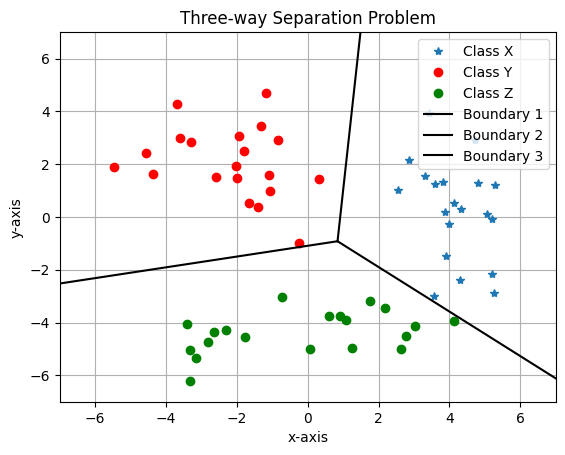

In [147]:
# Variables and coefficients (to be optimized, but here hardcoded for illustration)
a1 = a_1.value
a2 = a_2.value
a3 = a_3.value
b1 = b_1.value
b2 = b_2.value
b3 = b_3.value

# Find maximally confusing point
A = np.vstack((a1 - a2, a1 - a3))
b = np.array([b1 - b2, b1 - b3])
p = np.linalg.lstsq(A, b, rcond=None)[0]

# Find intersection point
x_int = np.linalg.inv(np.vstack([a1, a2])) @ np.vstack([b1,b2])
x_1_int = x_int[0]

# Plotting
t_1 = np.linspace(x_1_int, 7, 1400)
t_2 = np.linspace(-7, x_1_int, 1400)
t_3 = np.linspace(x_1_int, 7, 1400)

u1 = a1 - a2
u2 = a2 - a3
u3 = a3 - a1
v1 = b1 - b2
v2 = b2 - b3
v3 = b3 - b1

line1 = (-t_1 * u1[0] + v1) / u1[1]
line2 = (-t_2 * u2[0] + v2) / u2[1]
line3 = (-t_3 * u3[0] + v3) / u3[1]

# Plot decision boundaries and data points
plt.plot(X[0], X[1], '*', label='Class X')
plt.plot(Y[0], Y[1], 'ro', label='Class Y')
plt.plot(Z[0], Z[1], 'go', label='Class Z')
plt.plot(t_1, line1, 'k', label='Boundary 1')
plt.plot(t_2, line2, 'k', label='Boundary 2')
plt.plot(t_3, line3, 'k', label='Boundary 3')

plt.legend()
plt.axis([-7, 7, -7, 7])
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Three-way Separation Problem')
plt.grid()
plt.show()


In [144]:
x_1_int

array([0.83988838])